# Importing Libraries

In [60]:
import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score,mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

#scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

#view all the dataframe
pd.set_option('display.max_columns',None)

#Increase the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

# Loading data

In [61]:
df = pd.read_csv('dataset/CarPrice_Assignment.csv') 
df.shape

(205, 26)

In [62]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Preprocessing

### EDA

In [63]:
# the elements whithin each Feature
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print( 'The number of values for feature {} :{} --{}'.format(column, nr_values, unique_vals))

    else:
        print( 'The number of values for feature {}:{}'.format(column, nr_values))



The number of values for feature car_ID:205
The number of values for feature symboling :6 --[-2 -1  0  1  2  3]
The number of values for feature CarName:147
The number of values for feature fueltype :2 --['diesel' 'gas']
The number of values for feature aspiration :2 --['std' 'turbo']
The number of values for feature doornumber :2 --['four' 'two']
The number of values for feature carbody :5 --['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel :3 --['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation :2 --['front' 'rear']
The number of values for feature wheelbase:53
The number of values for feature carlength:75
The number of values for feature carwidth:44
The number of values for feature carheight:49
The number of values for feature curbweight:171
The number of values for feature enginetype :7 --['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
The number of values for feature cylindernumber :7 --['eight' 'five' 'four' 'six' 

### Checking Null values

In [64]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Numeric values with Scatte plots

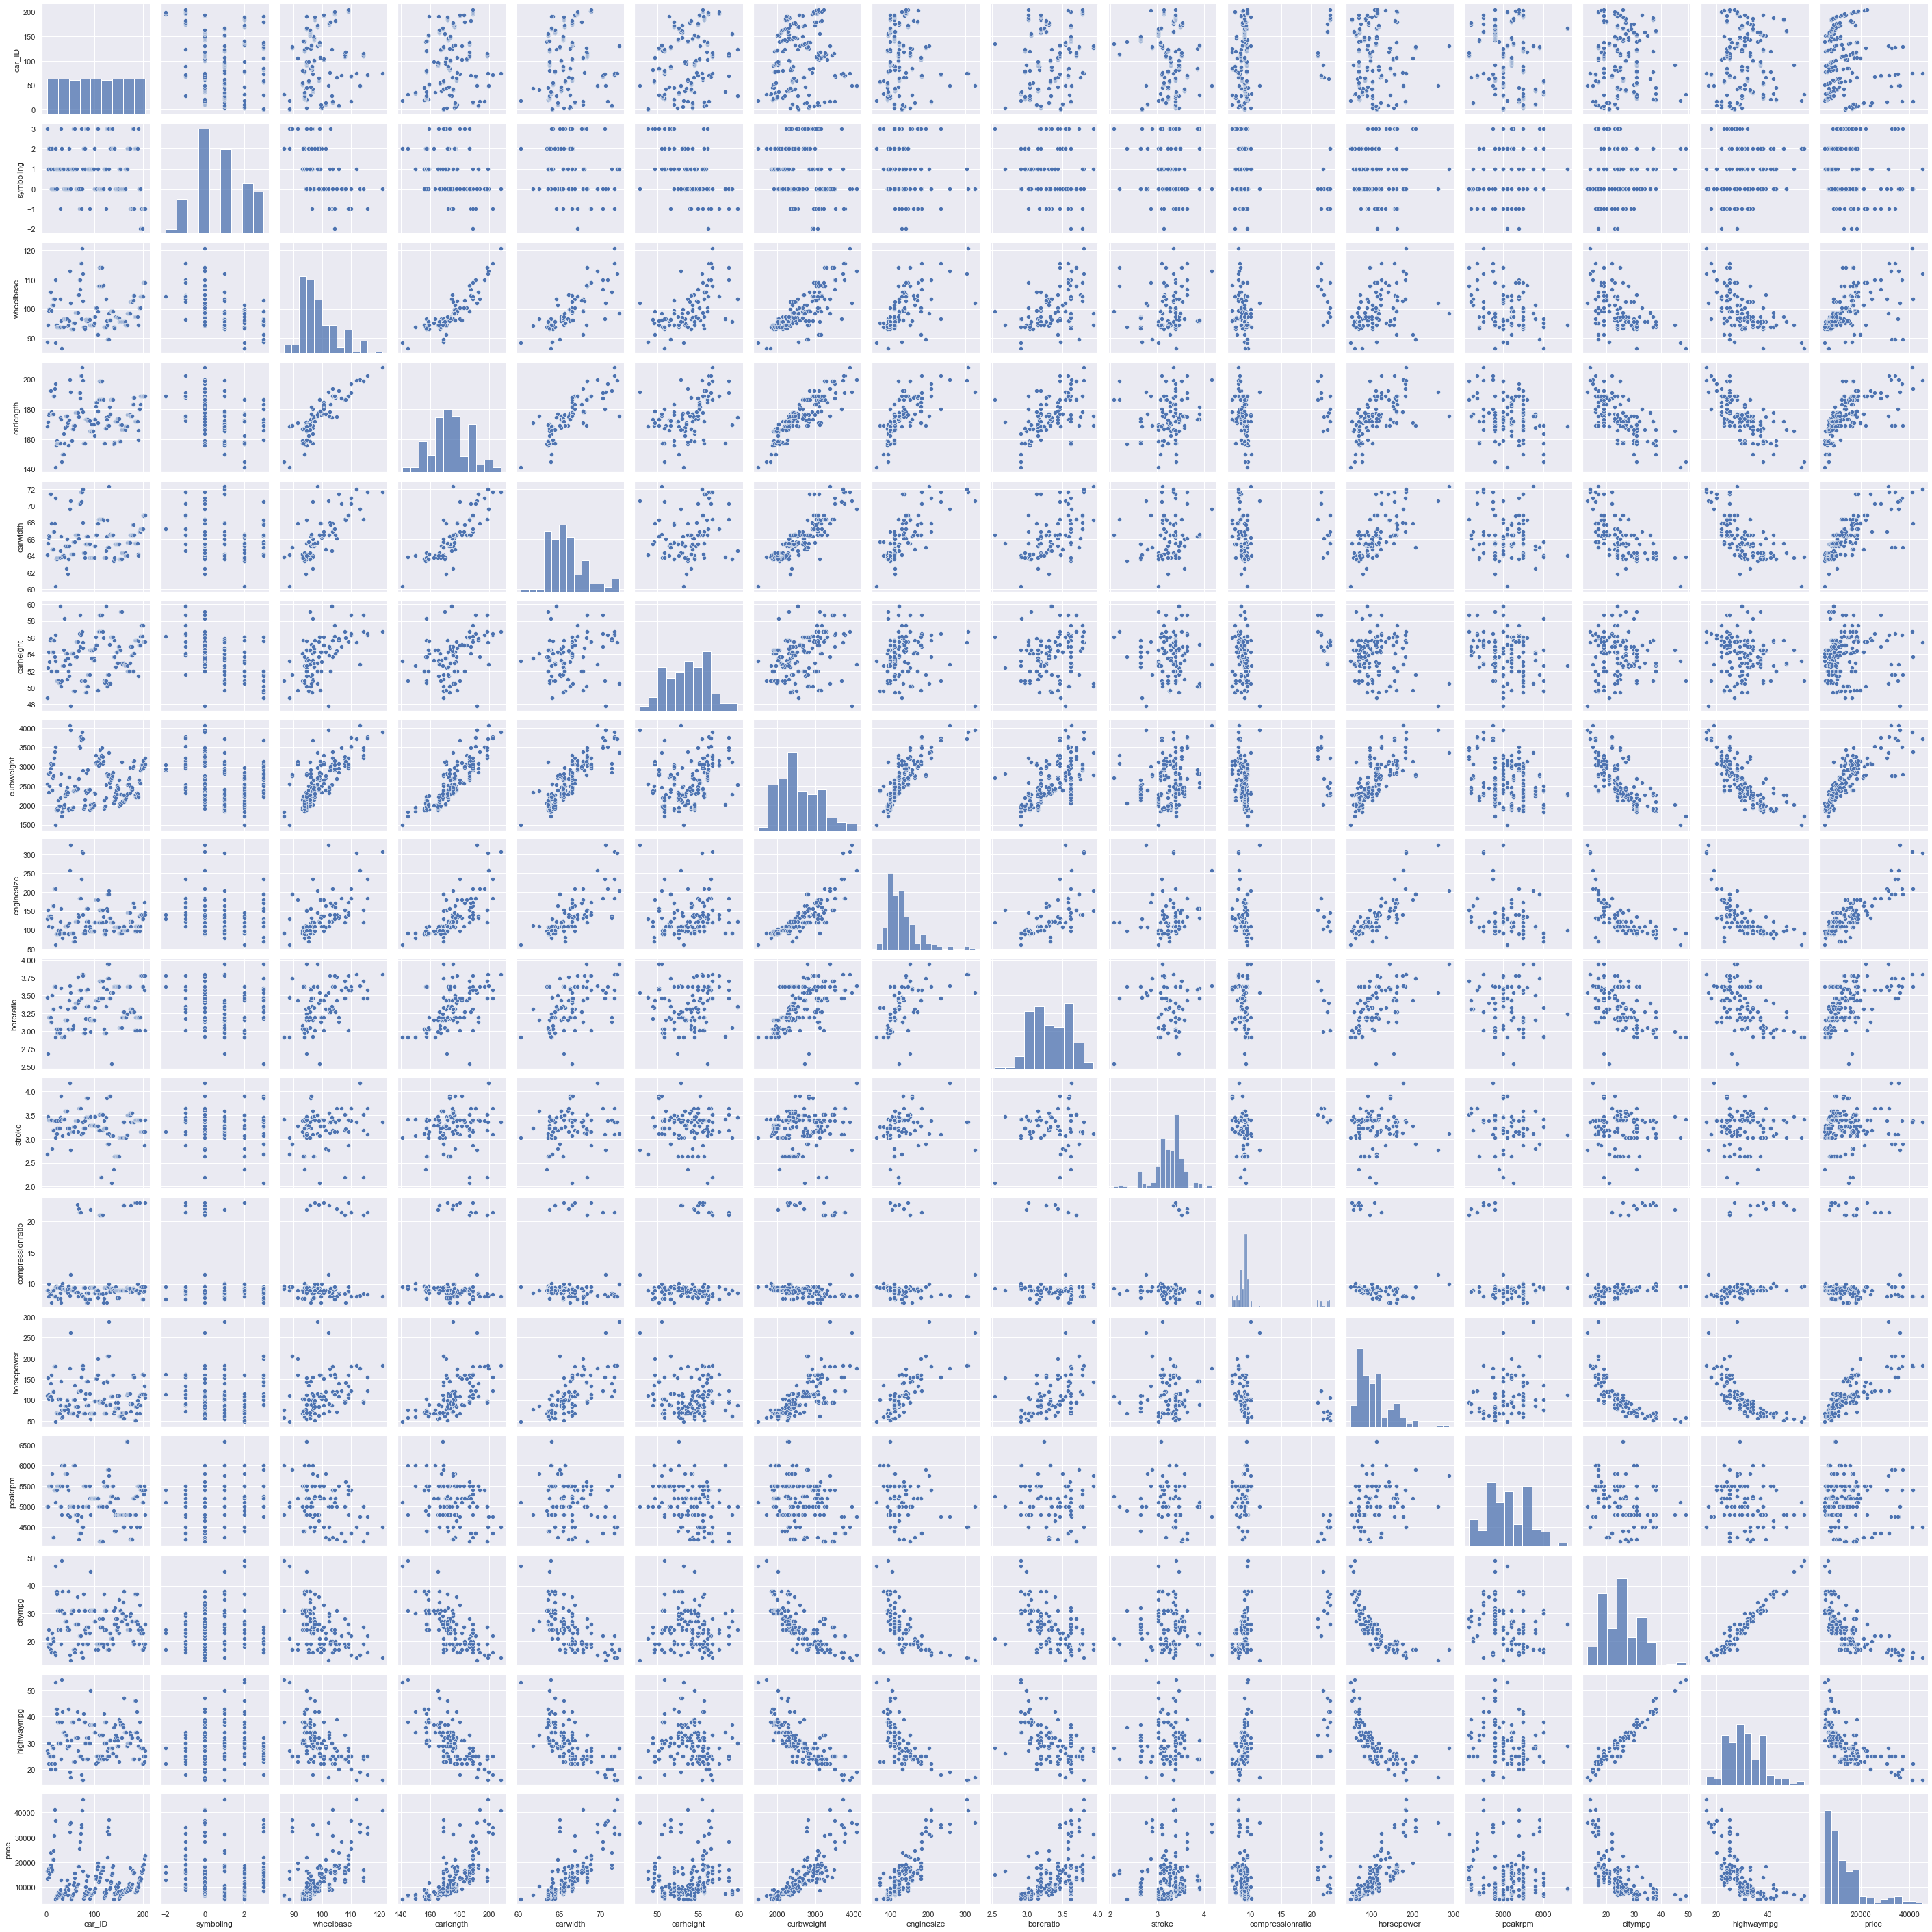

In [65]:
g = sns.pairplot(df)

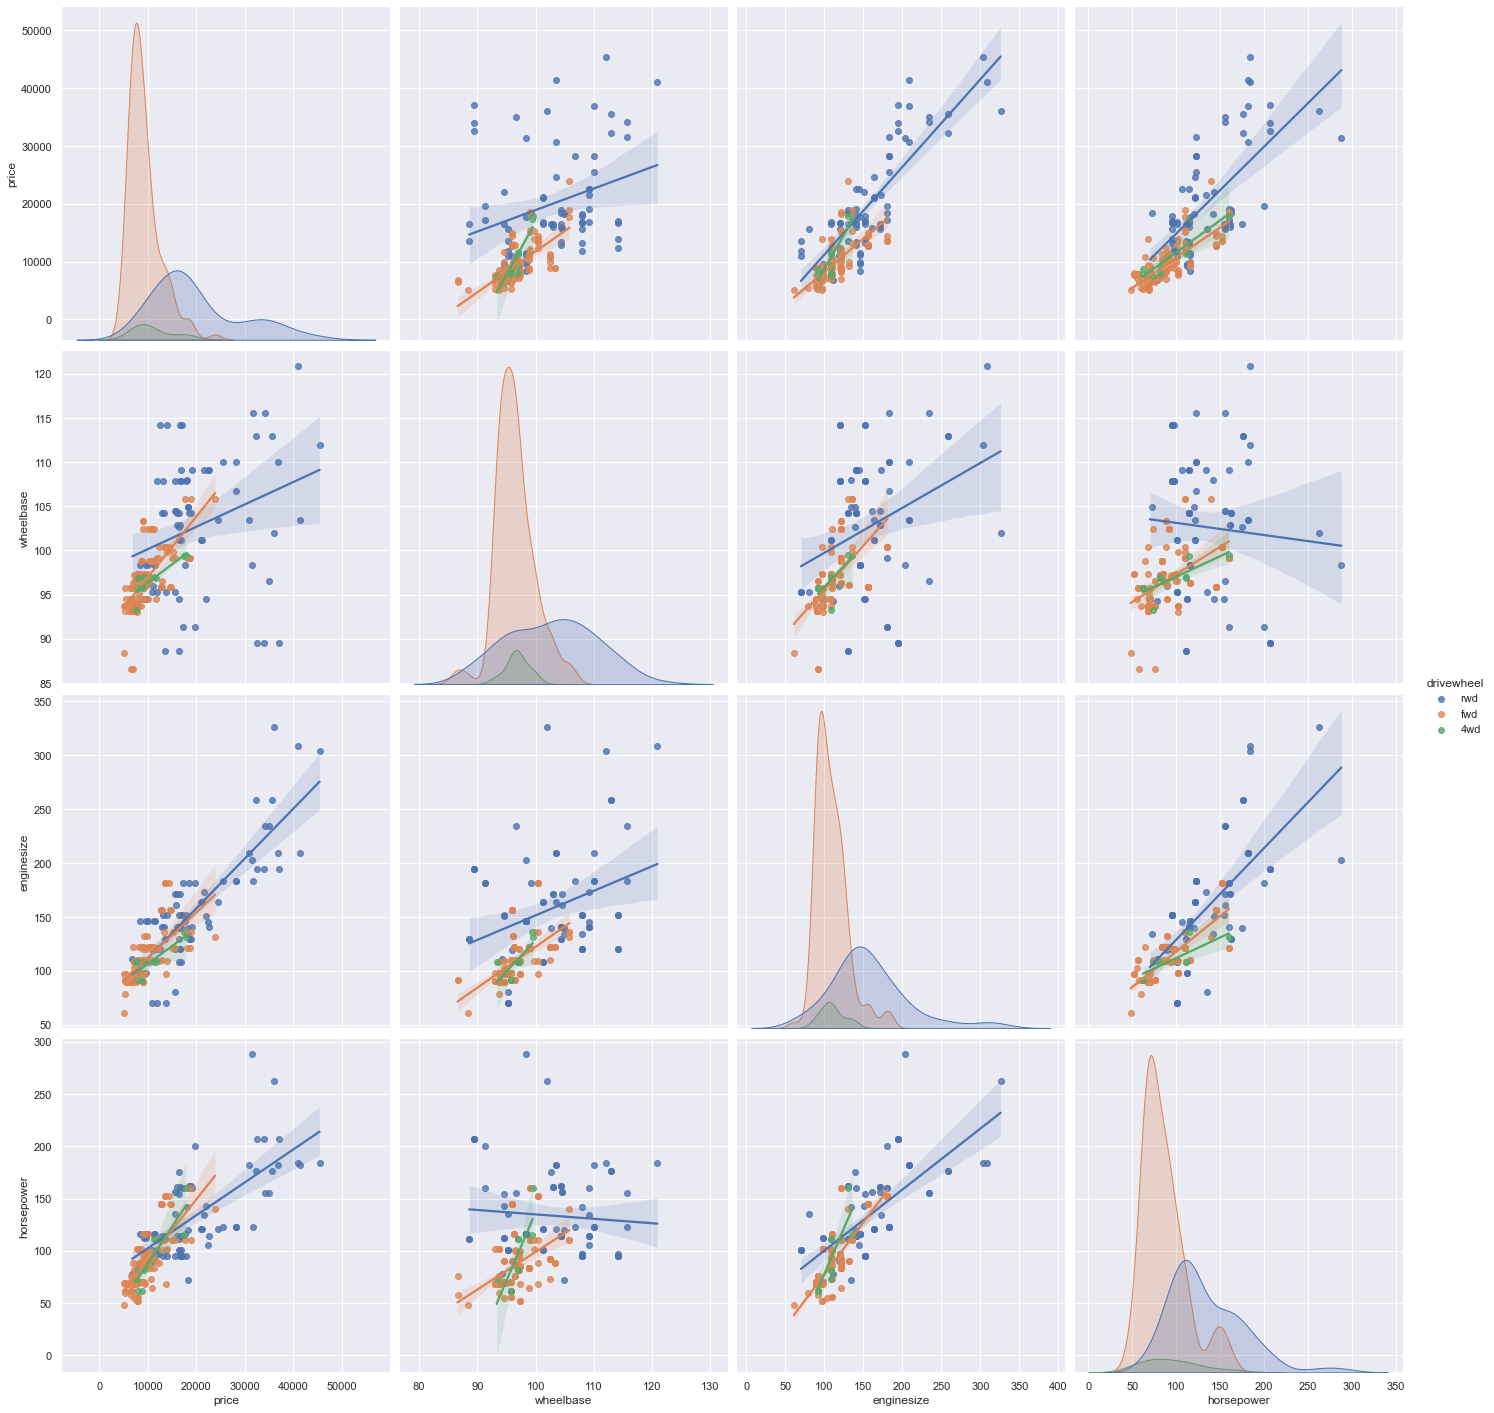

In [66]:
g= sns.pairplot(df[['price','wheelbase','enginesize' , 'horsepower' , 'drivewheel']],hue='drivewheel',height=5,kind='reg')


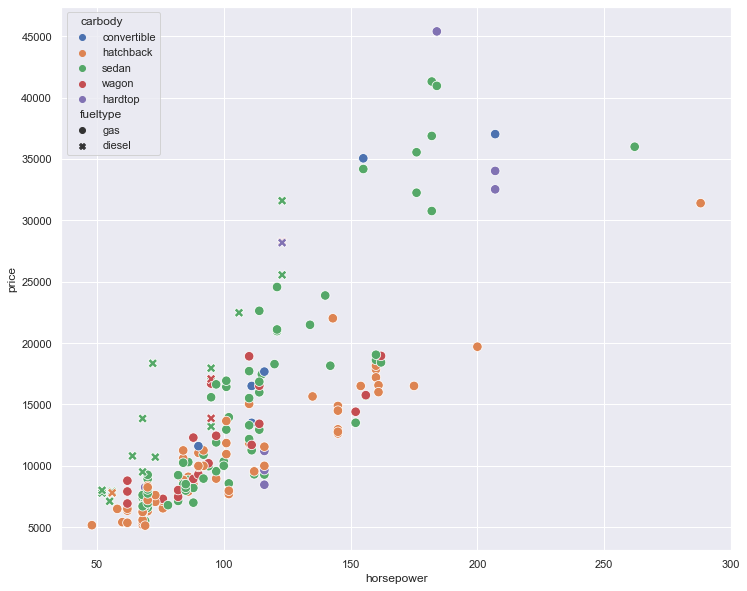

In [68]:
 ax = sns.scatterplot(x="horsepower",y="price",data=df,hue='carbody',style='fueltype',s=90)

### Categorical data

,carbody,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10376.652386
3,sedan,14344.270833
4,wagon,12371.960000


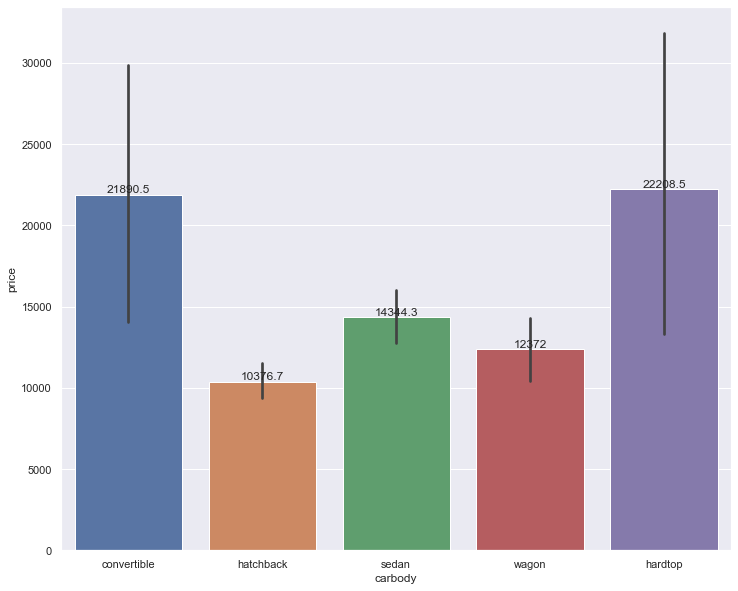

In [69]:
d = sns.barplot(x='carbody',y='price',data=df)
d.bar_label(d.containers[0])

df[['carbody','price']].groupby('carbody',as_index=False).agg({'price':'mean'})

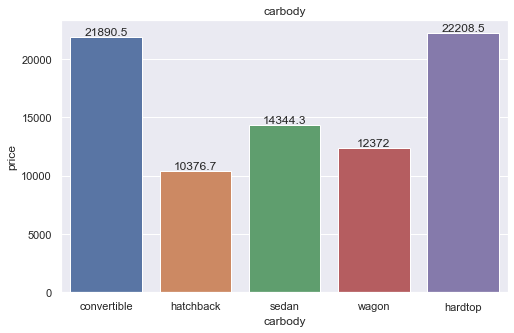

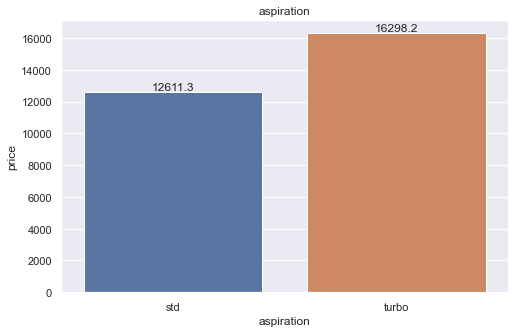

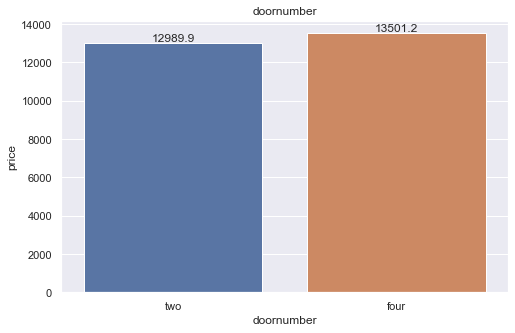

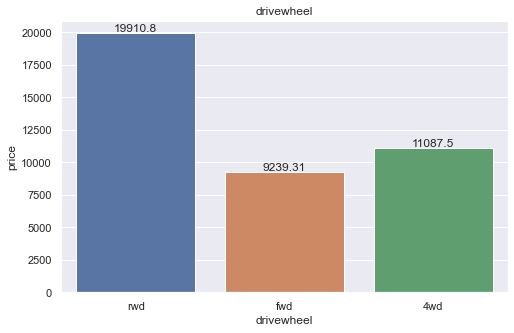

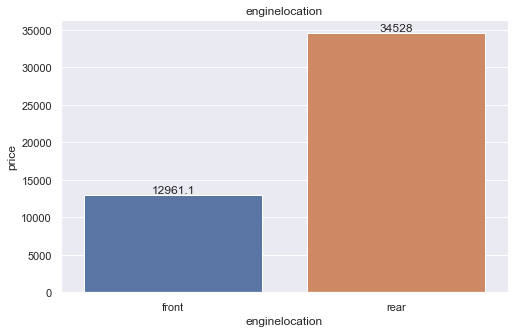

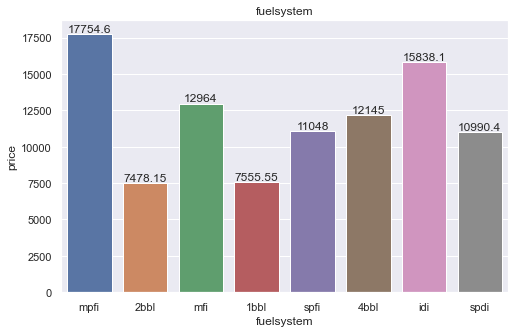

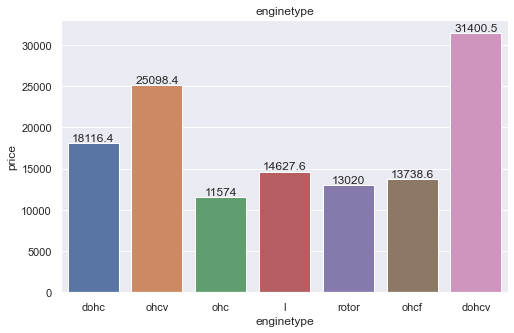

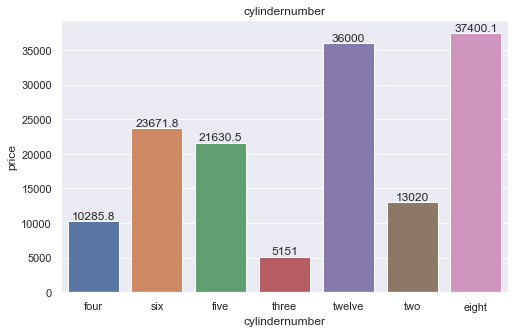

In [70]:
categories = ['carbody','aspiration','doornumber','drivewheel','enginelocation','fuelsystem','enginetype','cylindernumber']
sns.set(rc={'figure.figsize':(8,5)})


for c in categories:
    
    f = sns.barplot(x=c,y='price',data=df,ci=False)
    for container in f.containers:
        f.bar_label(container)
    plt.title(c)
    plt.show()


### Distribution with Disti plots

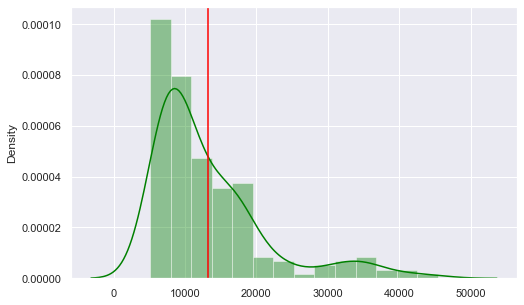

In [71]:
v = df['price'].values

sns.distplot(v,color='green')

mean=df['price'].mean()

plt.axvline(mean,0,1,color='red')

### Distribution and Outliers

median is : 10295.0


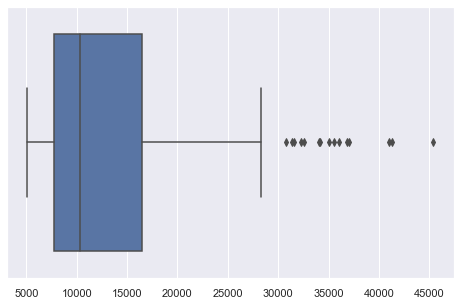

In [72]:
c = df['price'].values
ax=sns.boxplot(c)
print('median is :',df['price'].median())

In [73]:
numerics = ['int16','int32','int64','float16','float32','float64']
n_var = df.select_dtypes(include=numerics).columns
n_var

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

median is : 103.0


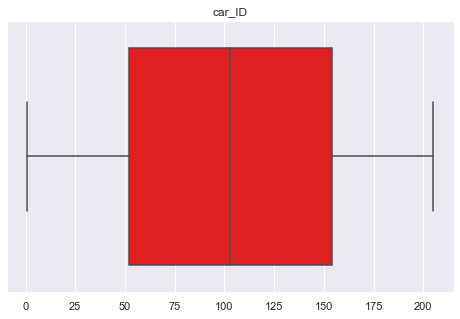

median is : 1.0


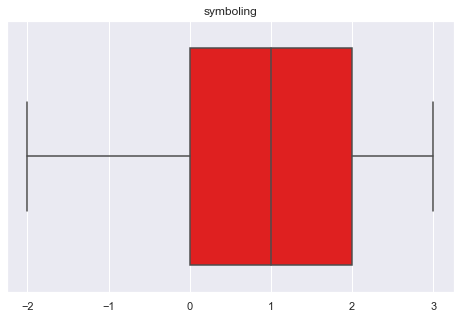

median is : 97.0


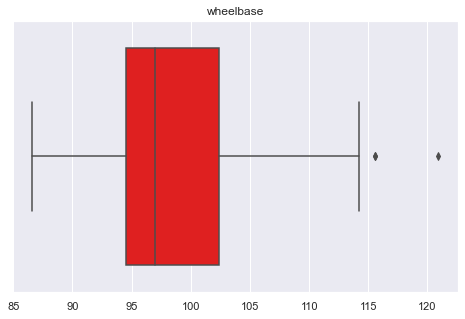

median is : 173.2


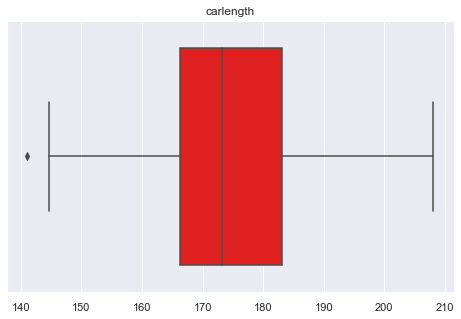

median is : 65.5


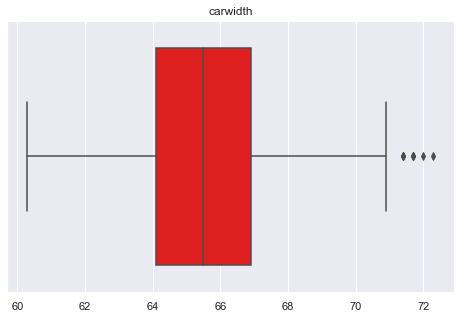

median is : 54.1


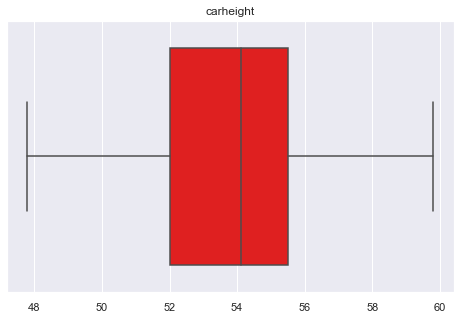

median is : 2414.0


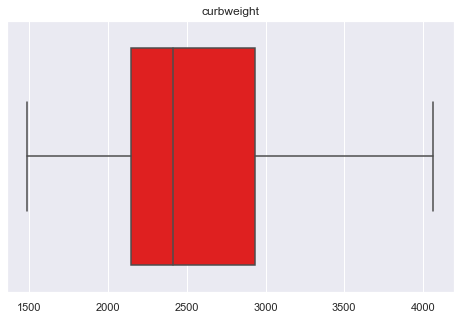

median is : 120.0


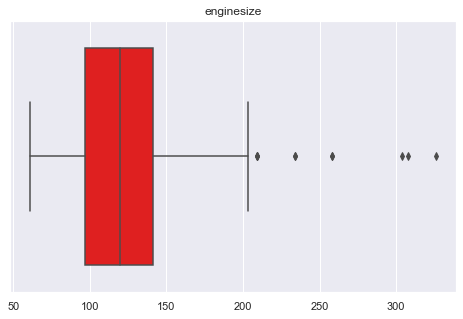

median is : 3.31


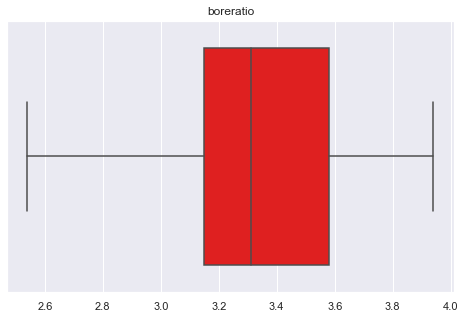

median is : 3.29


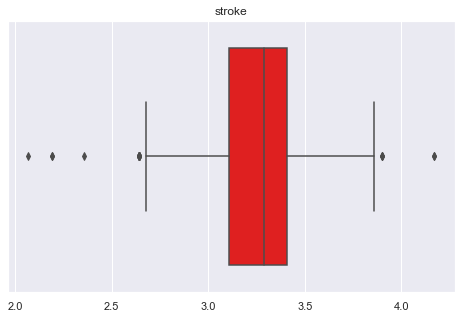

median is : 9.0


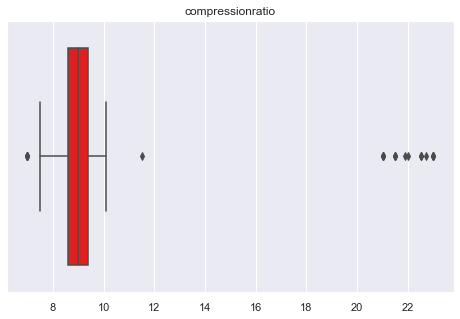

median is : 95.0


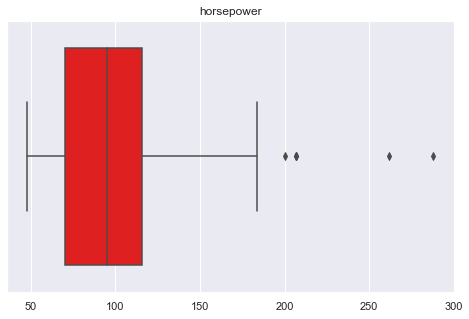

median is : 5200.0


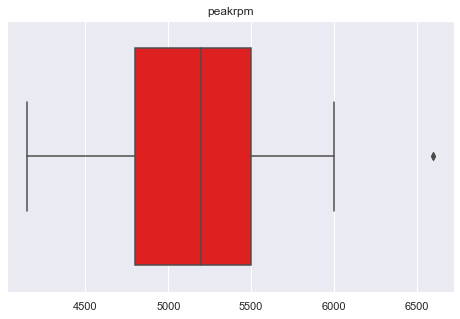

median is : 24.0


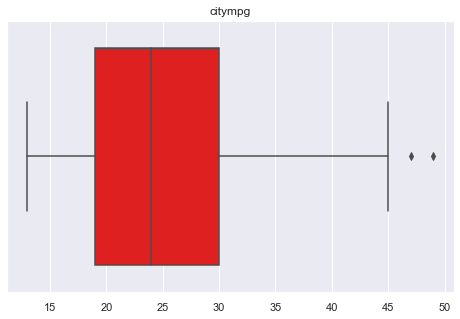

median is : 30.0


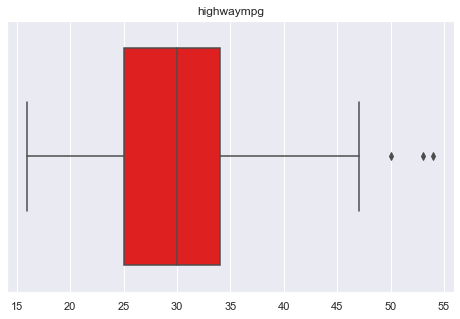

median is : 10295.0


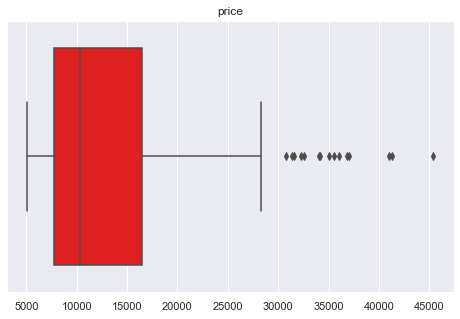

In [74]:
sns.set(rc={'figure.figsize':(8,5)})

for c in n_var:
    v = df[c].values
    ax = sns.boxplot(v,color='red')
    print('median is :',df[c].median())
    plt.title(c)
    plt.show()

### Categorical values into numerical represtation

In [76]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [77]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [78]:
ndf = pd.get_dummies(df,columns=['carbody','aspiration','doornumber','drivewheel','enginelocation','fuelsystem','enginetype','cylindernumber','fueltype'])
ndf.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [84]:
ndf.dtypes

car_ID                     int64
symboling                  int64
wheelbase                float64
carlength                float64
carwidth                 float64
carheight                float64
curbweight                 int64
enginesize                 int64
boreratio                float64
stroke                   float64
compressionratio         float64
horsepower                 int64
peakrpm                    int64
citympg                    int64
highwaympg                 int64
price                    float64
carbody_convertible        uint8
carbody_hardtop            uint8
carbody_hatchback          uint8
carbody_sedan              uint8
carbody_wagon              uint8
aspiration_std             uint8
aspiration_turbo           uint8
doornumber_four            uint8
doornumber_two             uint8
drivewheel_4wd             uint8
drivewheel_fwd             uint8
drivewheel_rwd             uint8
enginelocation_front       uint8
enginelocation_rear        uint8
fuelsystem

### Selecting important features

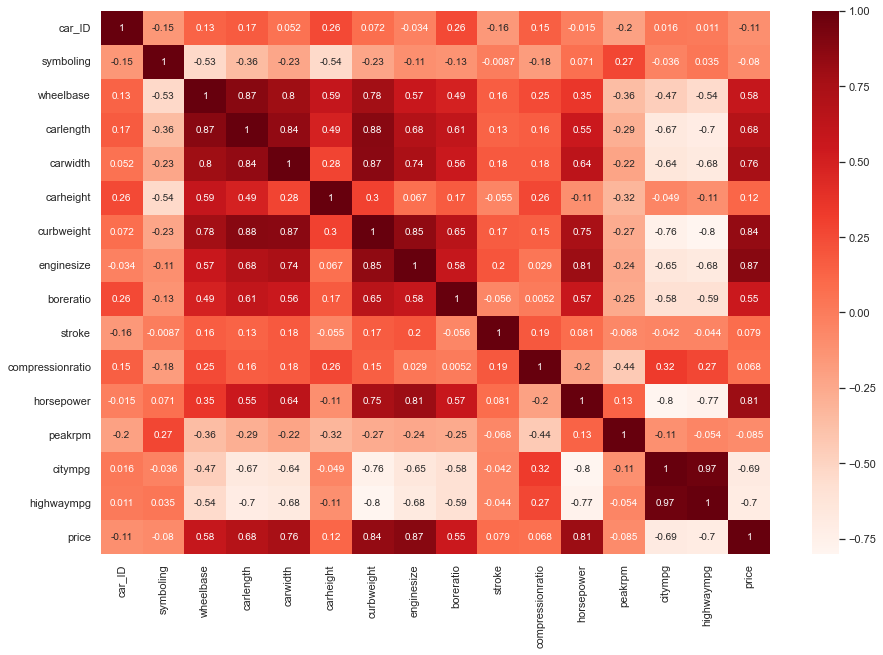

In [93]:
sns.set(rc={'figure.figsize':(15,10)})

n_var = ['car_ID','symboling','wheelbase','carlength'
         ,'carwidth','carheight','curbweight',
         'enginesize','boreratio','stroke',
         'compressionratio','horsepower','peakrpm',
         'citympg','highwaympg','price']

pc = ndf[n_var].corr(method = 'pearson')

cols = n_var

ax = sns.heatmap(pc,annot=True,yticklabels=cols,
                 xticklabels=cols,annot_kws={'size':10}
                 ,cmap="Reds")

In [92]:
pc

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


### Feature Importance

#### -> Split the data into X &y
#### -> Run a tree based estimators (i.e. DT or RF)
#### -> Run Feature Importance

In [98]:
X = ndf.drop(['price'],axis=1).values
X_cols = ndf.drop(['price'],axis=1)
y = ndf['price'].astype(int)
X.shape

(205, 53)

In [91]:
dt = DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [94]:
dt.feature_importances_

array([0.113039, 0.011117, 0.084415, 0.058869, 0.018449, 0.120699,
       0.225487, 0.027954, 0.042158, 0.013204, 0.013323, 0.106497,
       0.035769, 0.017642, 0.013231, 0.000000, 0.003083, 0.000000,
       0.022518, 0.011476, 0.003890, 0.000000, 0.007952, 0.006258,
       0.000000, 0.001297, 0.009659, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.001786, 0.000000, 0.002594, 0.000000,
       0.000000, 0.000000, 0.000000, 0.000000, 0.017977, 0.000000,
       0.007065, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
       0.000000, 0.000000, 0.000000, 0.002594, 0.000000])

In [111]:
#del final_fi
for i, column in enumerate(ndf.drop('price',axis=1)):
    print('Imporatance of feature {}:, {:.3f}'.format(column,dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable':[column],'Feature Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi],ignore_index=True)
    except:
        final_fi= fi

        
final_fi = final_fi.sort_values('Feature Score', ascending=False).reset_index()
final_fi

Imporatance of feature car_ID:, 0.113
Imporatance of feature symboling:, 0.011
Imporatance of feature wheelbase:, 0.084
Imporatance of feature carlength:, 0.059
Imporatance of feature carwidth:, 0.018
Imporatance of feature carheight:, 0.121
Imporatance of feature curbweight:, 0.225
Imporatance of feature enginesize:, 0.028
Imporatance of feature boreratio:, 0.042
Imporatance of feature stroke:, 0.013
Imporatance of feature compressionratio:, 0.013
Imporatance of feature horsepower:, 0.106
Imporatance of feature peakrpm:, 0.036
Imporatance of feature citympg:, 0.018
Imporatance of feature highwaympg:, 0.013
Imporatance of feature carbody_convertible:, 0.000
Imporatance of feature carbody_hardtop:, 0.003
Imporatance of feature carbody_hatchback:, 0.000
Imporatance of feature carbody_sedan:, 0.023
Imporatance of feature carbody_wagon:, 0.011
Imporatance of feature aspiration_std:, 0.004
Imporatance of feature aspiration_turbo:, 0.000
Imporatance of feature doornumber_four:, 0.008
Imporat

,level_0,index,Variable,Feature Score
0,0,0.0,curbweight,0.225487
1,165,NaN,curbweight,0.225487
2,1,112.0,curbweight,0.225487
3,2,1.0,curbweight,0.225487
4,3,2.0,carheight,0.120699
...,...,...,...,...
207,121,66.0,enginetype_dohcv,0.000000
208,120,68.0,enginetype_ohcf,0.000000
209,119,69.0,enginelocation_rear,0.000000
210,118,70.0,enginetype_rotor,0.000000


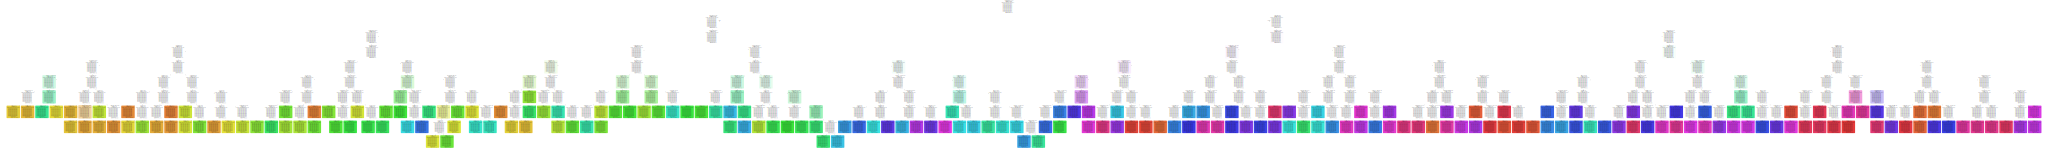

In [110]:
 import graphviz
from sklearn import tree

d_data = tree.export_graphviz(dt,out_file=None,
                             feature_names = ndf.drop('price',axis=1).columns,
                             class_names = ndf['price'].unique().astype(str),
                             filled = True, rounded=True,
                             special_characters=True)
grap = graphviz.Source(d_data)
grap

### Spliting data 

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8,test_size=.2,random_state=15)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(164, 53) (41, 53) (164,) (41,)



## Linear Regression


In [117]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_train)

In [124]:
print("Accuracy on training dataset",lr.score(X_train,y_train))
print("Accuracy on testing dataset",lr.score(X_test,y_test))

Accuracy on training dataset 0.9528171619551935
Accuracy on testing dataset 0.8754855257520533
